# 🌳 Random Forest Classifier

### Authors:
| Name                          | Github user                                        |
|-------------------------------|----------------------------------------------------|
| Sergio Herreros Fernández     | [@SergioHerreros](https://github.com/SERGI0HERREROS)|
| Francisco Javier Luna Ortiz   | [@Lunao01](https://github.com/Lunao01)|
| Carlos Romero Navarro         | [@KarManiatic](https://github.com/KarManiatic)|
| Tatsiana Shelepen             | [@Naschkatzee](https://github.com/Naschkatzee) | 

<br>

## 1. Data

In [26]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings("ignore")

# Data
H1N1_training_set_features_df = pd.read_csv('gold/H1N1_training_set_features_df.csv') # training set features
Seasonal_training_set_features_df = pd.read_csv('gold/Seasonal_training_set_features_df.csv') # training set features

training_set_labels_df = pd.read_csv('data/training_set_labels.csv') # training set labels

H1N1_test_set_features_df = pd.read_csv('gold/H1N1_test_set_features_df.csv') # test set features
Seasonal_test_set_features_df = pd.read_csv('gold/Seasonal_test_set_features_df.csv') # test set features

<br>

## 2. Approach

Modelling.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

In [28]:
## RandomForestClassifier - h1n1_vaccine
rf_classifier_h1n1_vaccine = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
rf_classifier_h1n1_vaccine.fit(H1N1_training_set_features_df.iloc[:, 1:], training_set_labels_df['h1n1_vaccine'])

RandomForestClassifier(criterion='entropy', random_state=0)

In [29]:
## RandomForestClassifier - seasonal_vaccine
rf_classifier_seasonal_vaccine = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
rf_classifier_seasonal_vaccine.fit(Seasonal_training_set_features_df.iloc[:, 1:], training_set_labels_df['seasonal_vaccine'])

RandomForestClassifier(criterion='entropy', random_state=0)

Prediction.

In [30]:
rfc_y_pred_h1n1_vaccine = rf_classifier_h1n1_vaccine.predict_proba(H1N1_test_set_features_df.iloc[:, 1:])

rfc_y_pred_seasonal_vaccine = rf_classifier_seasonal_vaccine.predict_proba(Seasonal_test_set_features_df.iloc[:, 1:])

Results.

In [31]:
y_preds = pd.DataFrame(
    {
        'respondent_id': Seasonal_test_set_features_df['respondent_id'],
        'h1n1_vaccine': rfc_y_pred_h1n1_vaccine[:, 1],
        'seasonal_vaccine':rfc_y_pred_seasonal_vaccine[:, 1],
    },

)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.24,0.25
1,26708,0.03,0.01
2,26709,0.50,0.90
3,26710,0.56,0.90
4,26711,0.30,0.58


<br>

## 3. Evaluation

In [32]:
X = H1N1_training_set_features_df
y_h1n1_vaccine = training_set_labels_df[['h1n1_vaccine']]
y_seasonal_vaccine = training_set_labels_df[['seasonal_vaccine']]

X_train_h1n1_vaccine, X_test_h1n1_vaccine, y_train_h1n1_vaccine, y_test_h1n1_vaccine = train_test_split(X, y_h1n1_vaccine, 
                                                    test_size=0.25, 
                                                    shuffle=True,
                                                    stratify=y_h1n1_vaccine,
                                                    random_state=1)

X_train_seasonal_vaccine, X_test_seasonal_vaccine, y_train_seasonal_vaccine, y_test_seasonal_vaccine = train_test_split(X, y_seasonal_vaccine, 
                                                    test_size=0.25, 
                                                    shuffle=True,
                                                    stratify=y_seasonal_vaccine,
                                                    random_state=1)

In [33]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

h1n1_vaccine ROC curve.

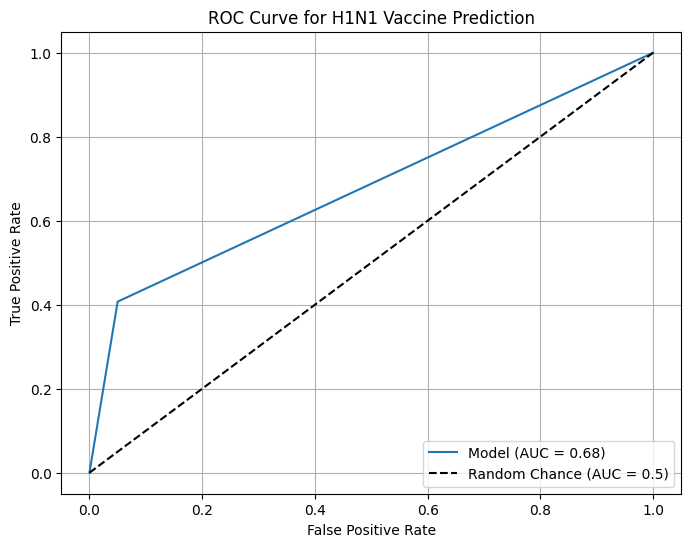

In [34]:
roc_rf_classifier_h1n1_vaccine = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
roc_rf_classifier_h1n1_vaccine.fit(X_train_h1n1_vaccine, y_train_h1n1_vaccine)


pred_roc_h1_n1 = roc_rf_classifier_h1n1_vaccine.predict(X_test_h1n1_vaccine)

# Calcular los valores FPR (False Positive Rate), TPR (True Positive Rate) y el umbral
fpr, tpr, _ = roc_curve(y_test_h1n1_vaccine, pred_roc_h1_n1)

# Calcular el AUC
auc = roc_auc_score(y_test_h1n1_vaccine, pred_roc_h1_n1)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for H1N1 Vaccine Prediction')
plt.legend(loc='lower right')
plt.grid()
plt.show()


seasonal_vaccine ROC curve.

<br>

## 4. Export results

The results of the model's prediction will be exported as a CSV to the results folder of the project.

In [35]:
# Export the CSV.
y_preds.to_csv('./results/RandomForestClassifier_results.csv', index=False)